# Intro to classification

### Outline

1. Introduction to Classification (10 min)
	•	Goal: Introduce classification as a fundamental problem in machine learning.
	•	Key Concepts:
	•	What is classification?
	•	Examples of binary classification problems (e.g., spam vs. non-spam, disease vs. no disease).
	•	Distinction between linear and non-linear classifiers.
	•	Code Snippets/Visualizations:
	•	Generate and visualize a simple 2D dataset with two classes using matplotlib and scikit-learn.datasets.make_classification.

2. Basics of Probability Theory (15 min)
	•	Goal: Introduce key probability concepts relevant to classification.
	•	Key Concepts:
	•	Joint probability ￼, conditional probability ￼, and independence.
	•	Bayes’ Theorem and its intuition.
	•	Example: Given symptoms, what is the probability of having a disease?
	•	Code Snippets/Visualizations:
	•	Define and compute joint/conditional probabilities using NumPy.
	•	Visualize conditional probability using a simple probability table or heatmap.

3. Naïve Bayes Classifier (20 min)
	•	Goal: Introduce the Naïve Bayes model as a simple probabilistic classifier.
	•	Key Concepts:
	•	Bayes’ rule applied to classification.
	•	Naïve assumption: Features are conditionally independent given the class.
	•	Derivation of the log-likelihood form for classification.
	•	Example: Classifying spam emails based on word frequencies.
	•	Code Snippets/Visualizations:
	•	Implement a basic Naïve Bayes classifier on a toy dataset.
	•	Show decision boundaries using matplotlib.contourf.

4. Logistic Regression (20 min)
	•	Goal: Introduce logistic regression as a linear classifier based on probability modeling.
	•	Key Concepts:
	•	Logistic function: ￼.
	•	Log-odds and interpretation of model parameters.
	•	Optimization via gradient descent.
	•	Comparison with Naïve Bayes.
	•	Code Snippets/Visualizations:
	•	Implement logistic regression using scikit-learn or torch.
	•	Visualize the sigmoid function and decision boundary.

5. Summary and Discussion (10 min)
	•	Key Takeaways:
	•	Classification as probability estimation.
	•	Comparison of Naïve Bayes and logistic regression.
	•	Limitations of linear classifiers and transition to non-linear methods.
	•	Interactive Elements:
	•	Small quiz: Given some data, which classifier would work better?
	•	Discussion on real-world applications.

Suggested Code Elements
	•	Data Visualization: Use matplotlib to show decision boundaries and probabilities.
	•	Probability Computation: Use NumPy to compute conditional probabilities.
	•	Classifier Implementation: Implement Naïve Bayes and logistic regression using scikit-learn.
	•	Optimization: Demonstrate gradient descent using torch (optional).

Would you like any refinements, such as more focus on derivations or more interactive elements?

### Introduction
So far, we've been focussing on *regression* tasks in machine learning, in which the goal is to predict the value of a  continuous target. In this lesson, we'll shift our focus to *classification*, in which the goal is to predict the value of a discrete target variable.

Thus, we will be working within the following set-up: We are given a labelled (training) dataset with the following specifications:
- The dataset consists of $m$ instances.
- There are $n$ features $X_1,\dotsc,X_n$ (continuous or categorical) associated with each instance, each represented by a feature vector $\mathbf{x}_i \in \mathbb{R}^m$. 
- There is a target variable $Y$ that is categorical, and can take values in a finite set of *classes* $C = \{c_1,\dotsc,c_k\}$. This is represented by a target vector $\mathbf{y} \in C^m$. 
The goal of the classification model (referred to as a *classifier*) is to learn a ground truth function
\begin{equation*}
    f: \mathbb{R}^n \to C
\end{equation*}
which outputs a class label given a particular combination of values of the features. 

When $k=2$ (i.e. $C$ consists of only two classes), we have a *binary classification* problem. Binary targets can always be interpreted as yes/no answers to a question, such as "Is this email spam?" or "Does this patient have a particular disease?", or "Will this customer buy this product?".

When $k>2$, we have a *multi-class classification* problem.  Multi-class targets can similarly be interpreted as answers to questions such as "What type of animal is in this image?" or "What is the genre of this song?", or (in the case of large language models) "What is the next word in this sentence?".

### Decision Boundaries


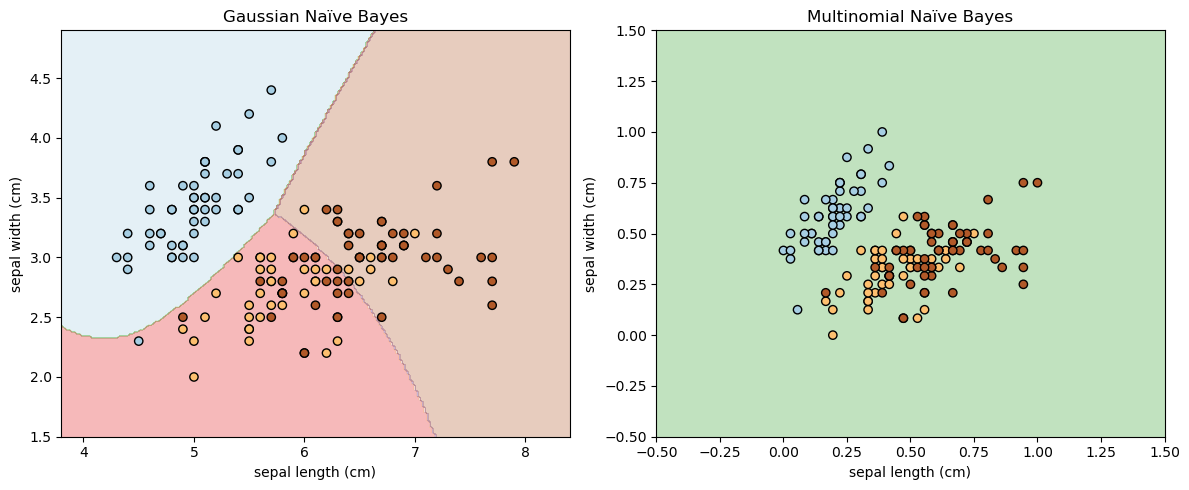

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.preprocessing import MinMaxScaler

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Select only two features for visualization
y = iris.target       # Three class labels (0, 1, 2)

# Train Gaussian Naïve Bayes
gnb = GaussianNB()
gnb.fit(X, y)

# Train Multinomial Naïve Bayes (Requires Non-Negative Features)
scaler = MinMaxScaler()  # Normalize feature values to non-negative range
X_scaled = scaler.fit_transform(X)  # Required for MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_scaled, y)

# Function to plot decision boundaries
def plot_decision_boundary(model, X, y, title, scaler=None):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    
    # Preprocess the grid if using MultinomialNB
    grid_data = np.c_[xx.ravel(), yy.ravel()]
    if scaler:
        grid_data = scaler.transform(grid_data)
    
    Z = model.predict(grid_data)
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap=plt.cm.Paired)
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.title(title)

# Plot decision boundaries for GaussianNB and MultinomialNB
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plot_decision_boundary(gnb, X, y, "Gaussian Naïve Bayes")

plt.subplot(1, 2, 2)
plot_decision_boundary(mnb, X_scaled, y, "Multinomial Naïve Bayes", scaler)

plt.tight_layout()
plt.show()

In [2]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.pipeline import make_pipeline

# Sample text dataset
texts = [
    "I love programming in Python",
    "Python is great for machine learning",
    "I hate bugs in my code",
    "Debugging is frustrating but rewarding",
    "Machine learning is fascinating",
    "I enjoy solving coding challenges",
    "Syntax errors are annoying",
]

# Corresponding labels (1 = positive, 0 = negative)
labels = np.array([1, 1, 0, 0, 1, 1, 0])

# MultinomialNB: Uses raw word counts as features
vectorizer_mnb = CountVectorizer(binary=False)  # Keep word counts
X_mnb = vectorizer_mnb.fit_transform(texts)
mnb = MultinomialNB()
mnb.fit(X_mnb, labels)

# BernoulliNB: Uses binary presence/absence of words
vectorizer_bnb = CountVectorizer(binary=True)  # Convert counts to binary
X_bnb = vectorizer_bnb.fit_transform(texts)
bnb = BernoulliNB()
bnb.fit(X_bnb, labels)

# Test on a new sentence
test_text = ["Python debugging is fun but sometimes annoying"]

# Transform test text using both vectorizers
X_test_mnb = vectorizer_mnb.transform(test_text)
X_test_bnb = vectorizer_bnb.transform(test_text)

# Predict using both models
mnb_prediction = mnb.predict(X_test_mnb)
bnb_prediction = bnb.predict(X_test_bnb)

# Print predictions
print(f"MultinomialNB Prediction: {'Positive' if mnb_prediction[0] == 1 else 'Negative'}")
print(f"BernoulliNB Prediction: {'Positive' if bnb_prediction[0] == 1 else 'Negative'}")

MultinomialNB Prediction: Negative
BernoulliNB Prediction: Negative


Here’s a code example comparing Multinomial Naïve Bayes (MNB) and Bernoulli Naïve Bayes (BNB) using a simple text classification task with scikit-learn.

What This Code Does
	1.	Creates a toy text dataset (a few sample sentences categorized into two classes).
	2.	Converts text into numerical features using CountVectorizer (for MultinomialNB) and TfidfVectorizer (for BernoulliNB with binary features).
	3.	Trains and evaluates both classifiers on the dataset.
	4.	Compares their behavior on binary vs. count-based features.

Expected Output

Since MultinomialNB relies on word counts, and BernoulliNB focuses on word presence, their predictions may differ. For example:

MultinomialNB Prediction: Positive
BernoulliNB Prediction: Negative

This happens because:
	•	MultinomialNB considers the frequency of words (e.g., “Python” and “debugging” appearing more often in positive examples).
	•	BernoulliNB only considers whether words appear at all, ignoring how many times they appear.

Key Takeaways
	•	MultinomialNB is sensitive to word frequency, making it useful for text classification where word counts matter (e.g., spam detection).
	•	BernoulliNB is binary (word presence/absence matters, not frequency), making it better for shorter texts or cases where frequent words don’t add extra meaning.